In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [2]:
#fetching data into variable
avo = pd.read_csv("avocado.csv")
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
#as we drop index column beacuse it just kind of id which have no effect on dataset
avo.drop('Unnamed: 0',inplace=True,axis=1)

In [4]:
#checking the total rows and total columns
avo.shape

(18249, 13)

In [5]:
#column names 
avo.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [6]:
#data types of the columns 
avo.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
#Extract the Month from DOB into separate column
avo['Month'] = pd.DatetimeIndex(avo['Date']).month
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [8]:
#Extract the Date from DOB into separate column
avo['Date'] = pd.DatetimeIndex(avo['Date']).day
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [9]:
#checking the value counts of each date
avo.Date.value_counts()

4     756
11    756
18    755
25    755
8     648
10    648
19    648
5     648
22    648
15    648
24    648
17    648
26    648
12    648
1     648
3     648
27    540
28    540
7     540
13    540
21    540
29    540
20    540
14    540
6     539
2     432
31    432
23    432
9     432
30    432
16    432
Name: Date, dtype: int64

In [10]:
#checking the value counts of each type
avo.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [11]:
#co relation of total volume to total bag
avo[['Total Volume','Total Bags']].corr()

,Total Volume,Total Bags
Total Volume,1.000000,0.963047
Total Bags,0.963047,1.000000


In [12]:
#checking the average year of volume of avacado per year
avo.groupby('year')['Total Volume'].mean()

year
2015    7.810274e+05
2016    8.584206e+05
2017    8.623393e+05
2018    1.066928e+06
Name: Total Volume, dtype: float64

In [13]:
#checking the organic type of avacado 
organic = avo[avo['type'] == 'organic']
organic

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
9126,27,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,organic,2015,Albany,12
9127,20,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.0,organic,2015,Albany,12
9128,13,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,0.0,organic,2015,Albany,12
9129,6,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,0.0,organic,2015,Albany,12
9130,29,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,0.0,organic,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [14]:
#checking the mean of price at each year of organic type of avacado
organic.groupby('year')['AveragePrice'].mean()

year
2015    1.673324
2016    1.571684
2017    1.735521
2018    1.567176
Name: AveragePrice, dtype: float64

In [15]:

#finding how much type of avacado is sell in last 4 year
avo.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [16]:
#total no of sale in each year of  4 years
avo.groupby('year')['Total Volume'].count()

year
2015    5615
2016    5616
2017    5722
2018    1296
Name: Total Volume, dtype: int64

In [17]:
#info function gives a concise summary about the dataframe
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
 13  Month         18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


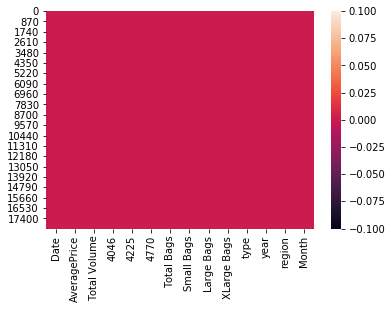

In [18]:
#checking null values using heatmap
sns.heatmap(avo.isnull())

In [19]:
#describe function gives a summary of the statistical data like mean, standard deviation, percentiles etc
avo.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,15.662612,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215
std,8.776281,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130
min,1.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,8.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000
50%,16.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,23.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000
max,31.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000


Above statatics data show that there multiple outliers mostly in XLargeBags There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction

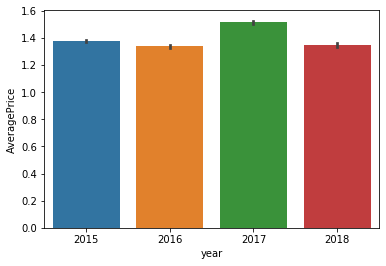

In [20]:
#checking ratio of year and price that which year had max average price
sns.barplot(x = "year" , y = "AveragePrice" ,data=avo )

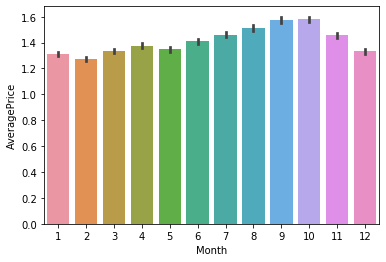

In [21]:
#checking ratio of month and price that which year had max average price
sns.barplot(x = "Month" , y = "AveragePrice" ,data=avo )

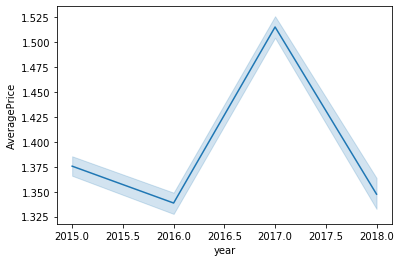

In [22]:
sns.lineplot(x = 'year', y = 'AveragePrice', data=avo)

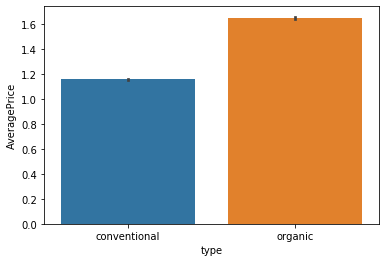

In [23]:

#checking ratio of type and price that which year had max average price
sns.barplot(x = "type", y = "AveragePrice" ,data=avo)

the above graph clearly shows that the organic ones have more price per unit  than conventional avocados

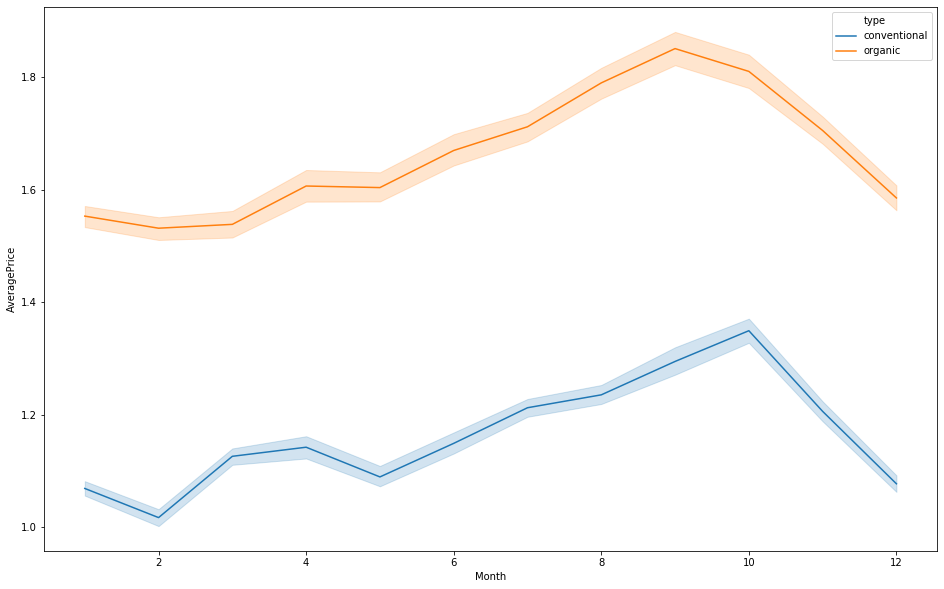

In [24]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=avo)
plt.show()

Above graph shown that there is hike between month 8-10 of both type of avacado

Text(0.5, 1.0, 'ration of Price and Region')

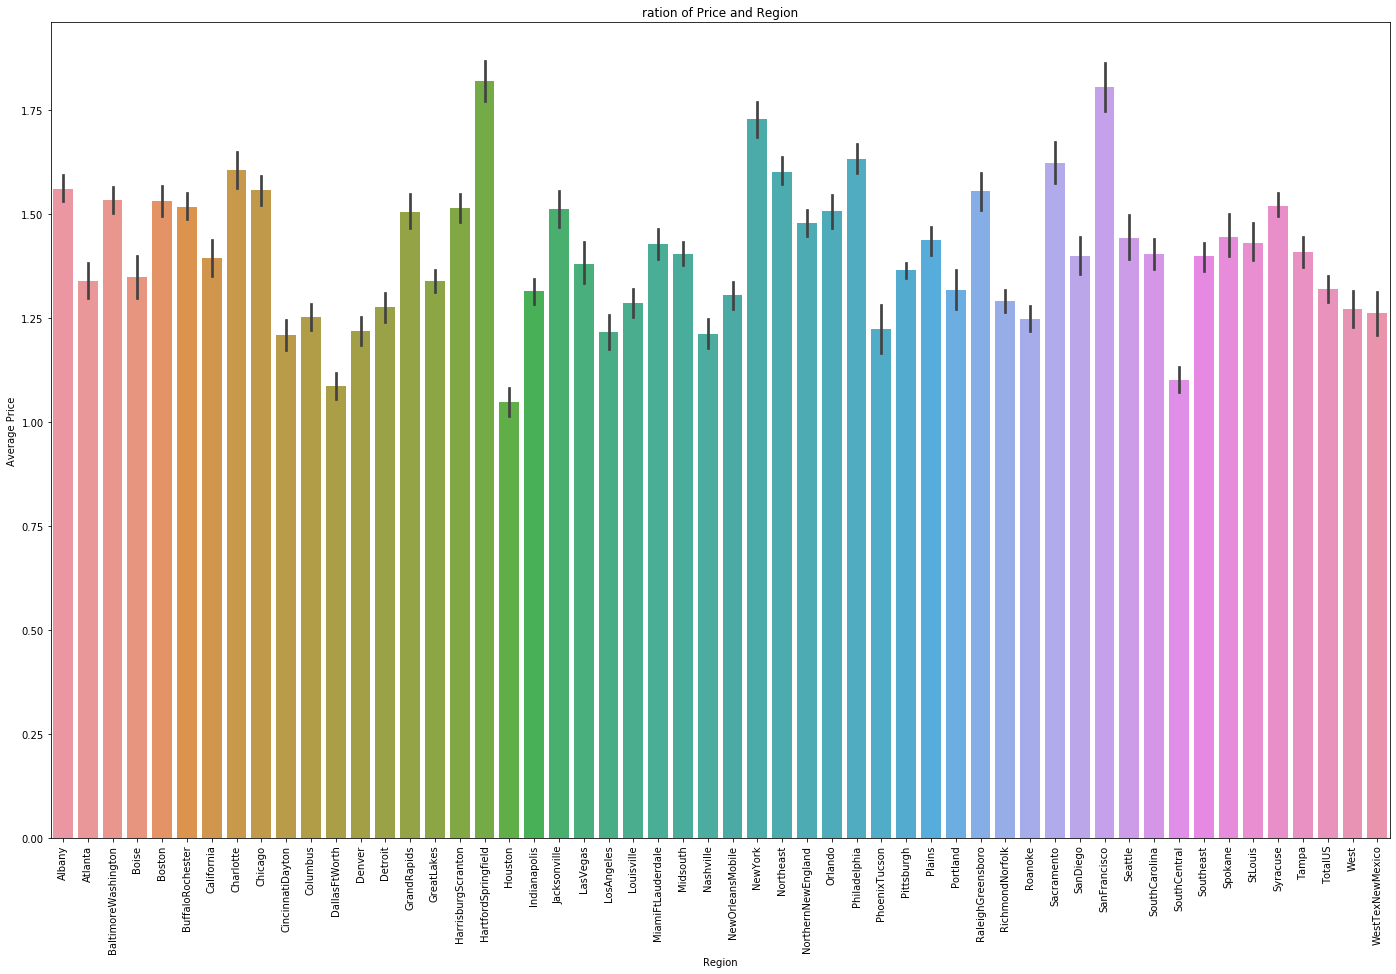

In [25]:
plt.figure(figsize=(24,15))
sns.barplot(x='region',y='AveragePrice',data=avo)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('ration of Price and Region')

above graph is showing that HartfordSpringfield ,SanFrancisco and NewYork are having more average price as compared to other region

Text(0.5, 1.0, 'Average_Price')

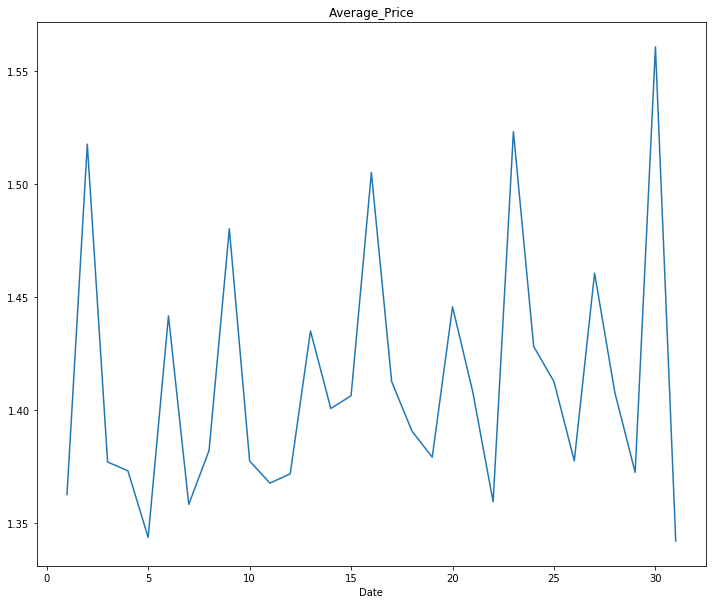

In [26]:
date=avo.groupby('Date').mean()
plt.figure(figsize=(12,10))
date['AveragePrice'].plot()
plt.title('Average_Price')

above is showing on date 28,29 and 30 the price of avacado is high

Text(0.5, 1.0, 'Average_Price')

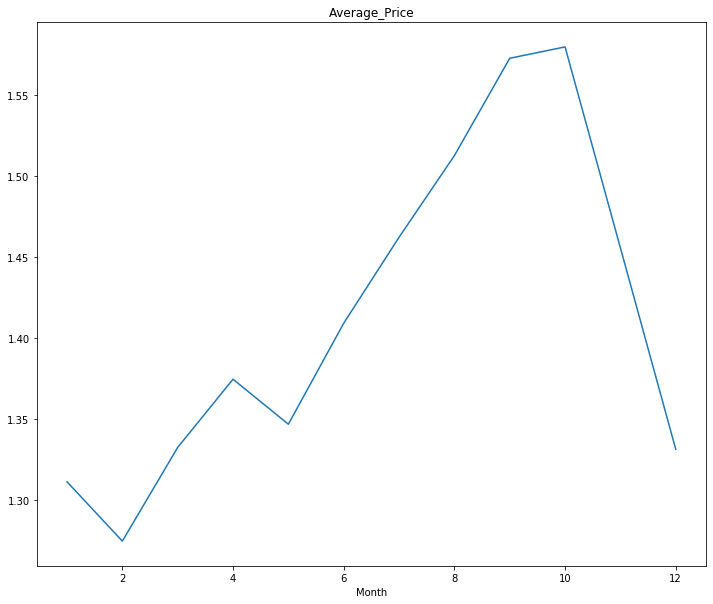

In [27]:
month=avo.groupby('Month').mean()
plt.figure(figsize=(12,10))
month['AveragePrice'].plot()
plt.title('Average_Price')


in between august to october the price of avacado is much higher as comapared to other months

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016BDA7612C8>,
      dtype=object)

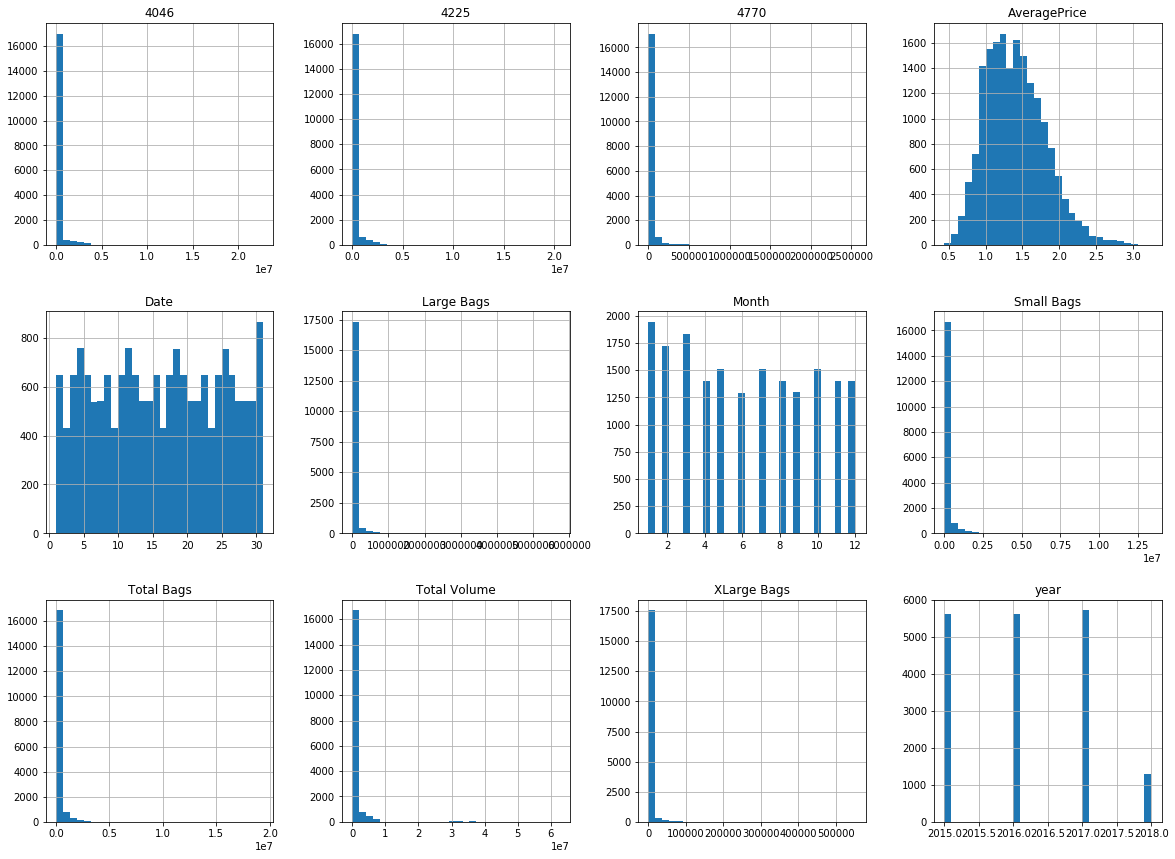

In [28]:
#plotting histogram for univariate analysis and checking the Normal Distribution
avo.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

In [29]:
avo['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [30]:
#Making the categorical data into numercial for better EDA
column = ['type','region']
le = LabelEncoder()
for i in column:
    avo[i] = le.fit_transform(avo[i].astype(str))

print(avo.dtypes)

Date              int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
Month             int64
dtype: object


In [31]:
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11


In [32]:
avo.type=avo.type.astype(float)

Date                AxesSubplot(0.125,0.71587;0.133621x0.16413)
AveragePrice     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Total Volume      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4046             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
4770               AxesSubplot(0.125,0.518913;0.133621x0.16413)
Total Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Small Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Large Bags      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
type               AxesSubplot(0.125,0.321957;0.133621x0.16413)
year            AxesSubplot(0.285345,0.321957;0.133621x0.16413)
region           AxesSubplot(0.44569,0.321957;0.133621x0.16413)
Month           AxesSubplot(0.606034,0.321957;0.133621x0.16413)
dtype: object

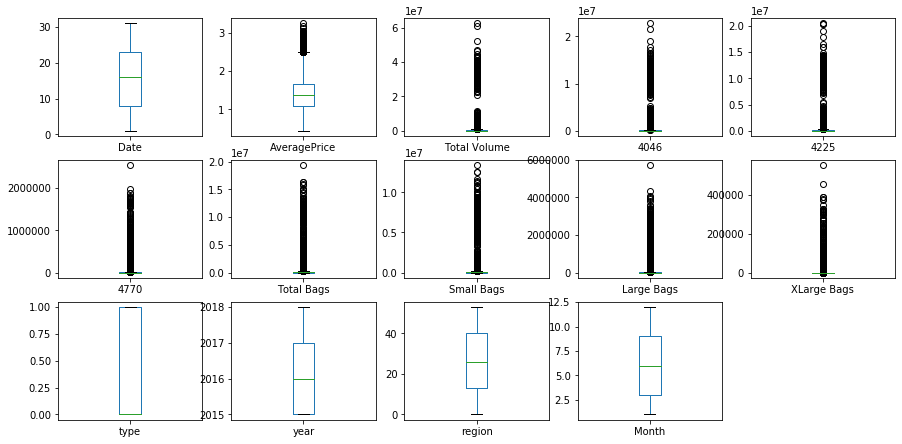

In [33]:
#plotting the boxplot of each column to check the outliers 
avo.plot(kind='box',subplots = True,layout=(4,5),figsize = (15,10))

In [34]:
#calculate the zscore
z = np.abs(zscore(avo))
print(z)

[[1.29185687 0.18868864 0.22771641 ... 1.22128204 1.7002522  1.64763162]
 [0.49423066 0.13901962 0.23042664 ... 1.22128204 1.7002522  1.64763162]
 [0.30339555 1.18206895 0.21208462 ... 1.22128204 1.7002522  1.64763162]
 ...
 [0.60817726 1.15237477 0.24233073 ... 1.97050371 1.70081131 1.46495942]
 [0.18944895 1.30138182 0.24162464 ... 1.97050371 1.70081131 1.46495942]
 [0.98707516 0.53151208 0.24125273 ... 1.97050371 1.70081131 1.46495942]]


[]

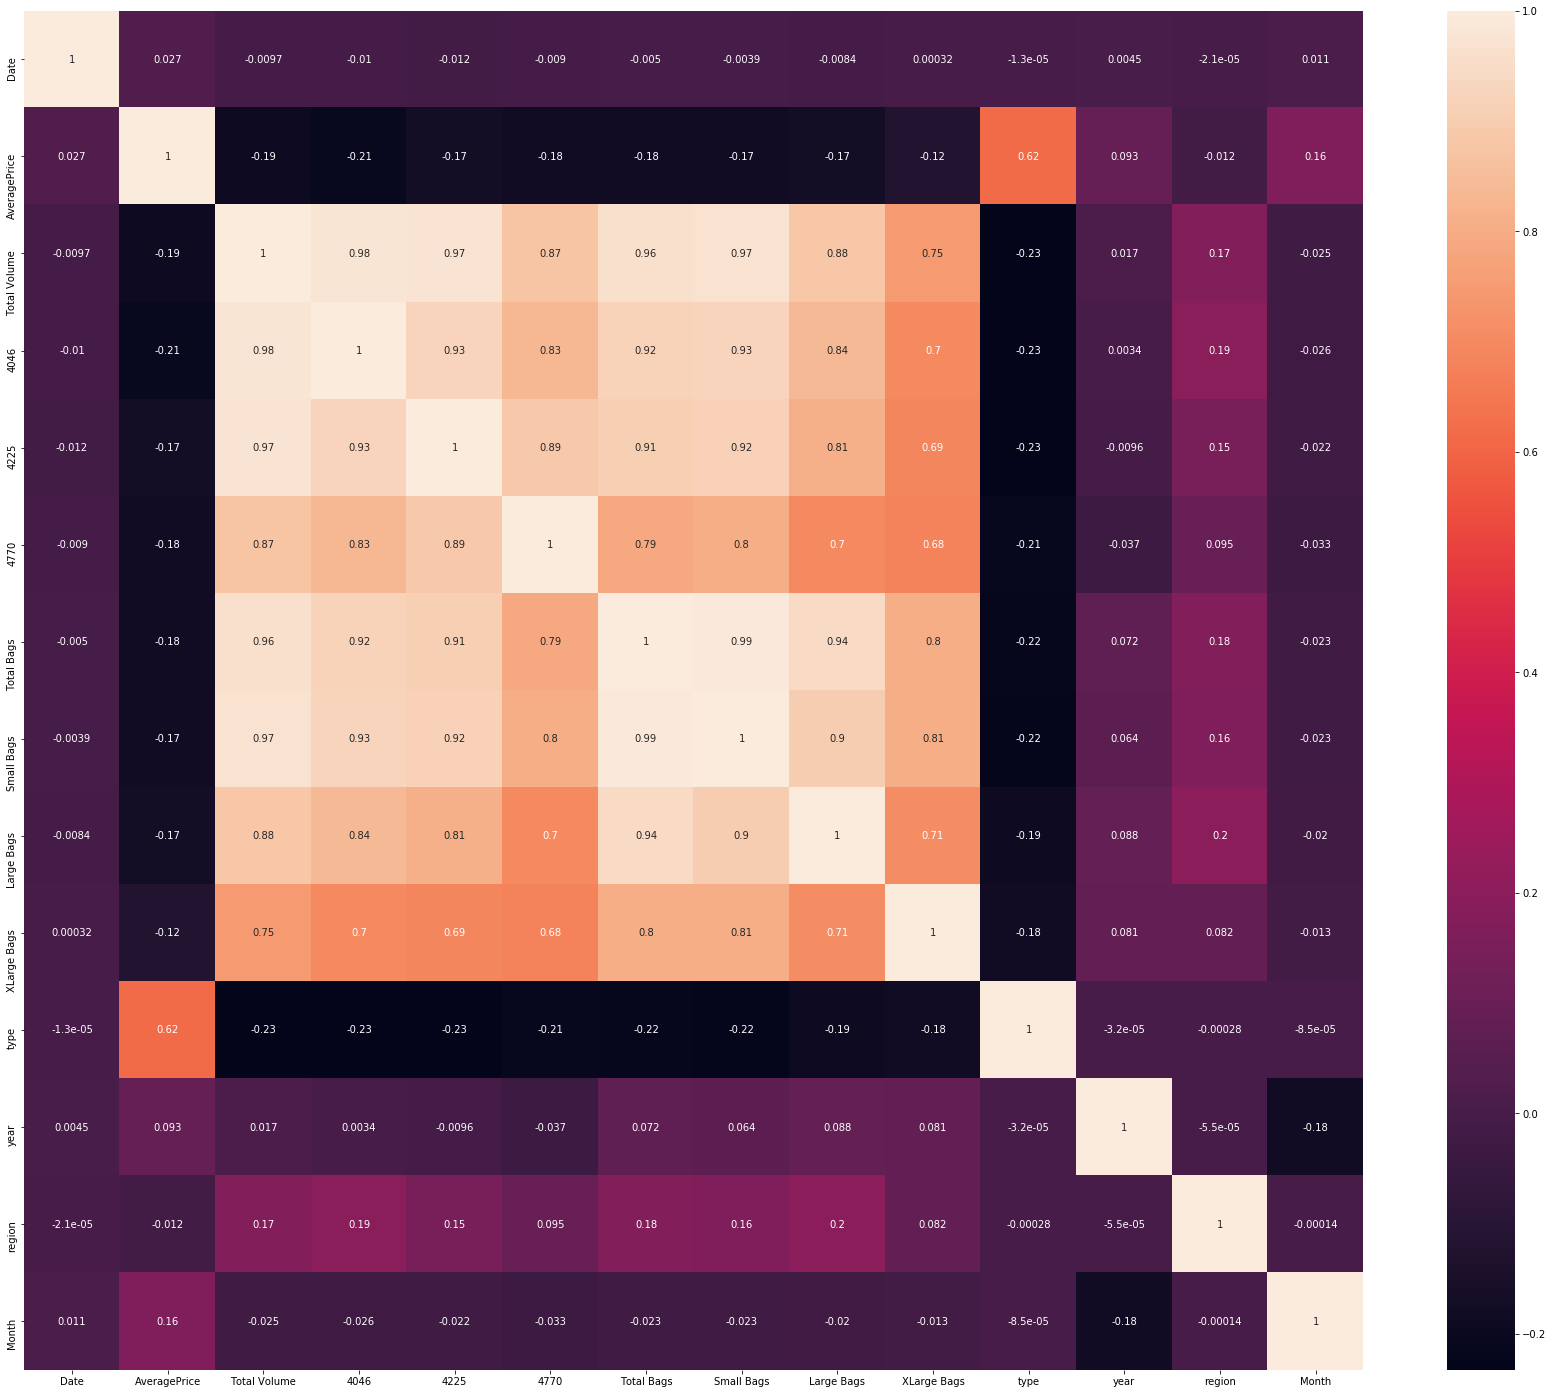

In [35]:
#checking the co-relation of all column to each other
avo_cor = avo.corr()
plt.figure(figsize=(30,25))
sns.heatmap(avo_cor,annot=True)
plt.plot()

as year is most negative co related column among all columns and also the difference is very close of each column

In [41]:
threshold = 3
print(np.where(z<3))
print(avo.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ..., 11, 12, 13], dtype=int64))
(17651, 14)


In [42]:
#Assign the value to df_new which are less the threshold value and removing the outliers
avo_new = avo[(z<3).all(axis = 1)]

ValueError: Item wrong length 18249 instead of 17651.

In [43]:
print(avo.shape)
print(avo_new.shape)
avo = avo_new
print('Shape after removing outlires',avo.shape)

(17651, 14)
(17651, 14)
Shape after removing outlires (17651, 14)


In [39]:
#now finding the mean value of each column 
print(avo['4225'].mean())
print(avo['Total Bags'].mean())
print(avo['Small Bags'].mean())

165600.94489433893
129816.01636961184
100628.33843918175


In [45]:
#replace the outlier value to its mean value to remove outliers
avo.loc[avo['4225']<3,'4225'] = np.mean(avo['4225'])
avo.loc[avo['Total Bags']<4.8,'Total Bags'] = np.mean(avo['Total Bags'])
avo.loc[avo['Small Bags']<4,'Small Bags'] = np.mean(avo['Small Bags'])

Date                AxesSubplot(0.125,0.71587;0.133621x0.16413)
AveragePrice     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Total Volume      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4046             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
4770               AxesSubplot(0.125,0.518913;0.133621x0.16413)
Total Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Small Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Large Bags      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
type               AxesSubplot(0.125,0.321957;0.133621x0.16413)
year            AxesSubplot(0.285345,0.321957;0.133621x0.16413)
region           AxesSubplot(0.44569,0.321957;0.133621x0.16413)
Month           AxesSubplot(0.606034,0.321957;0.133621x0.16413)
dtype: object

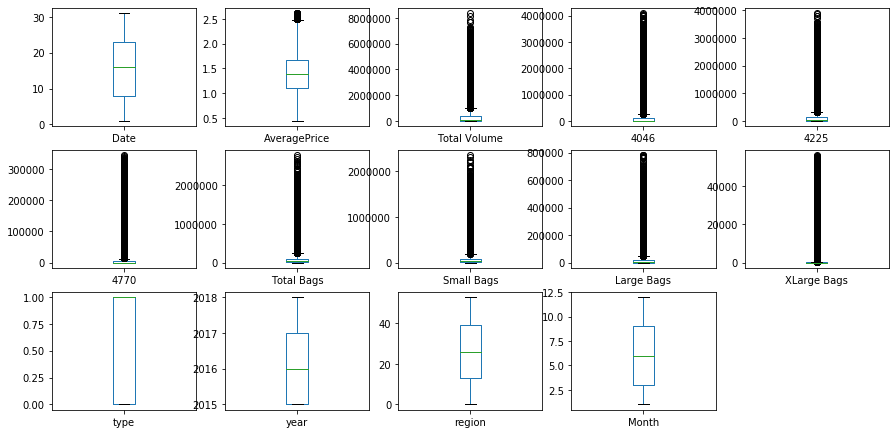

In [46]:
#plotting the boxplot of each column to check the outliers 
avo.plot(kind='box',subplots = True,layout=(4,5),figsize = (15,10))

Now there are no outliers in the data set after removing it through mean value

In [47]:
print(avo.shape)
print(avo_new.shape)
avo = avo_new
print('Shape after removing outlires',avo.shape)

(17651, 14)
(17651, 14)
Shape after removing outlires (17651, 14)


In [48]:
#check the skewness  of the data
avo.skew()

Date            0.011778
AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455664
4770            5.117170
Total Bags      4.066780
Small Bags      4.222709
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
dtype: float64

In [51]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew :
    if avo.skew().loc[col]>0.55:
        avo[col] = np.log1p(avo[col])

In [52]:
#check the new skewness
avo.skew()

Date            0.011778
AveragePrice    0.377432
Total Volume   -0.049950
4046           -0.420273
4225           -0.503957
4770            0.068532
Total Bags     -0.319074
Small Bags     -0.435520
Large Bags     -0.610874
XLarge Bags     0.911568
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016BDE610BC8>,
      dtype=object)

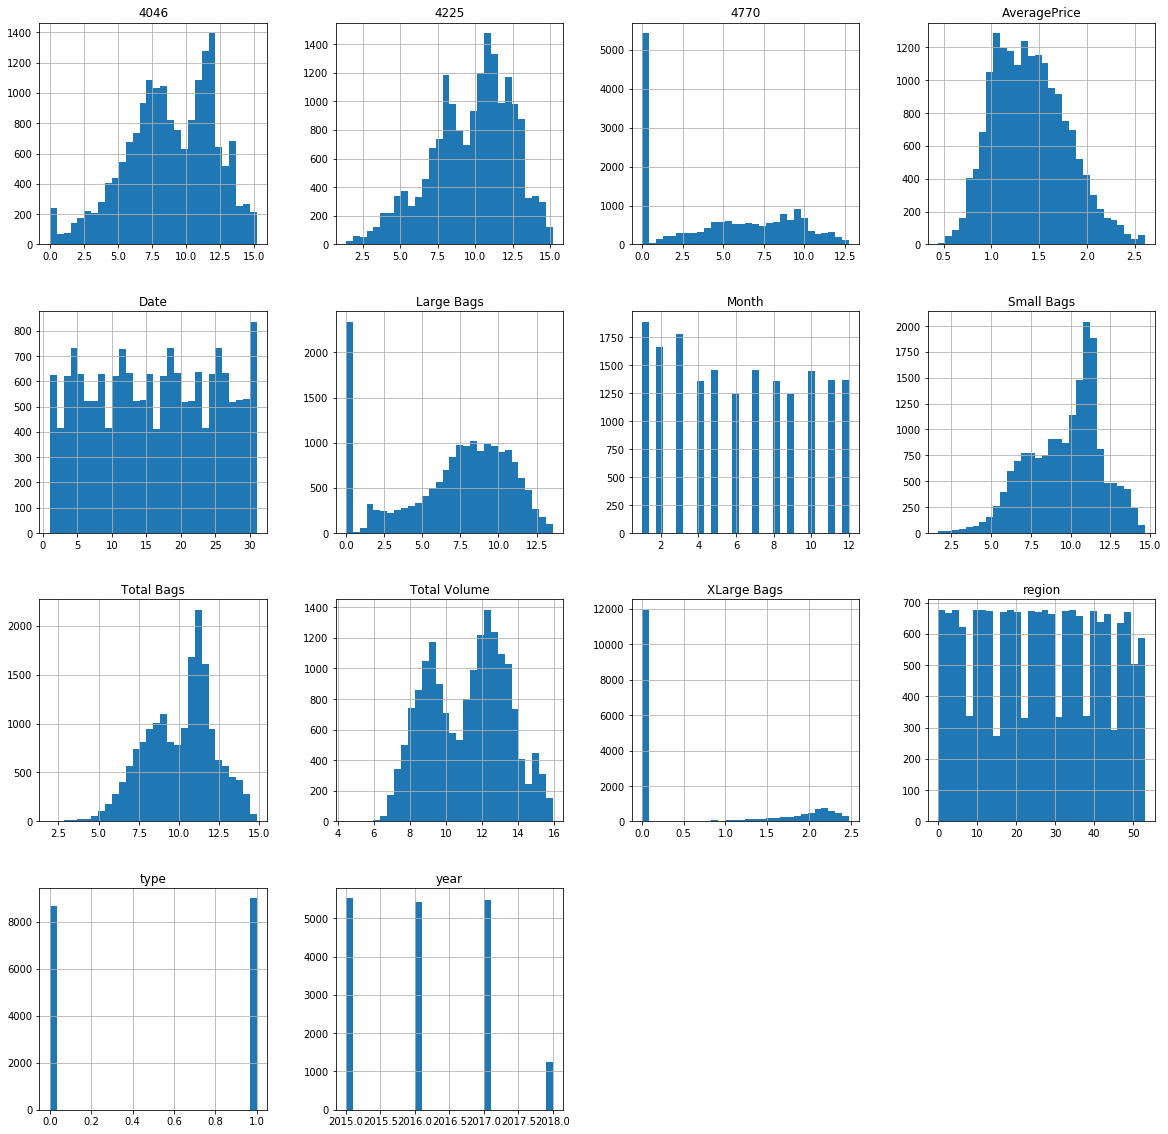

In [53]:
#plotting histogram for univariate analysis and checking the Normal Distribution
avo.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

average price, total bags and total volume is well normally distributed data among all column

In [54]:
#assign the value of x and y for training and testing phase
x = avo.drop(columns=['AveragePrice','Date'])
y = avo[["AveragePrice"]]
print(x.shape)
print(y.shape)

(17651, 12)
(17651, 1)


Above we are using AveragePrice as output variable and used to do the prediction

In [55]:

#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [56]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size = 0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score correspond to random state  40 is 0.7548102481999851
R2 score correspond to random state  40 is 0.8478621068506733
R2 score correspond to random state  40 is 0.561411153820006
R2 score correspond to random state  40 is 0.5447127147044171
R2 score correspond to random state  40 is 0.7503467423884156
R2 score correspond to random state  41 is 0.7355236842010477
R2 score correspond to random state  41 is 0.8416080330649017
R2 score correspond to random state  41 is 0.5464182839305807
R2 score correspond to random state  41 is 0.5358403933681847
R2 score correspond to random state  41 is 0.7462086035627709
R2 score correspond to random state  42 is 0.7189288631277537
R2 score correspond to random state  42 is 0.8388280744729943
R2 score correspond to random state  42 is 0.5445486836931455
R2 score correspond to random state  42 is 0.5424165895421388
R2 score correspond to random state  42 is 0.7404567208757835
R2 score correspond to random state  43 is 0.711017011323058
R2 score c

R2 score correspond to random state  66 is 0.5293964596084141
R2 score correspond to random state  66 is 0.7401252859173144
R2 score correspond to random state  67 is 0.7424503558510924
R2 score correspond to random state  67 is 0.8380931529903178
R2 score correspond to random state  67 is 0.565763242663929
R2 score correspond to random state  67 is 0.5463714436441736
R2 score correspond to random state  67 is 0.737931495341177
R2 score correspond to random state  68 is 0.715426481490114
R2 score correspond to random state  68 is 0.8411815509067108
R2 score correspond to random state  68 is 0.5619033875743744
R2 score correspond to random state  68 is 0.5415288866265722
R2 score correspond to random state  68 is 0.7438324409182258
R2 score correspond to random state  69 is 0.7348014857717924
R2 score correspond to random state  69 is 0.8481494770426103
R2 score correspond to random state  69 is 0.5454909457742139
R2 score correspond to random state  69 is 0.5513579815920688
R2 score co

In [59]:
#Checking the best parameter for prediction of KNeighborsRegressor Algo using GridSearchCV
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 80,test_size = 0.33)
KN = KNeighborsRegressor()
parameters={'n_neighbors' : range(1,30)}
gridsearch=GridSearchCV(LA,parameters)
gridsearch.fit(train_x,train_y)
gridsearch.best_params_

NameError: name 'la' is not defined

In [60]:
KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(train_x,train_y)
pred = KNN.predict(test_x)
r2_sc = r2_score(test_y,pred)
print("R2 Score :",r2_sc*100)

R2 Score : 85.2265221422544


In [61]:
print('Mean Absolute Error: ', mean_absolute_error(test_y,pred))
print('Mean squared Error: ', mean_squared_error(test_y,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(test_y,pred)))

Mean Absolute Error:  0.09985751072961374
Mean squared Error:  0.02136202575107296
Root Mean Absolute Error:  0.3160023903859174


Text(0, 0.5, 'Predicted_Y')

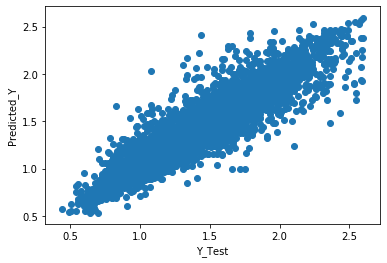

In [62]:
#checking the diff between actual and predicted value using graph
plt.scatter(x=test_y,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')


As above graph shown that it is predicting near to tha actual value and RMSE error is very less

In [63]:
#importing library for classification prediction
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [64]:
#assign the value of x and y for training and testing phase
x_c = avo.drop(columns=['region','Date'])
y_c = avo[["region"]]
print(x_c.shape)
print(y_c.shape)

(17651, 12)
(17651, 1)


In [65]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x_c)
x_c = pd.DataFrame(x_c,columns=x_c.columns)

now we are taking region as output variable and try to prediction using classification method

In [66]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = r_state,test_size = 0.33)
    for i_c in model:
        i_c.fit(train_xc,train_yc)
        pre_c = i_c.predict(test_xc)
        ac_score = accuracy_score(test_yc,pre_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model = i_c
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model)

accuracy score correspond to random state  40 is 0.783862660944206
accuracy score correspond to random state  40 is 0.8
accuracy score correspond to random state  41 is 0.7778540772532189
accuracy score correspond to random state  41 is 0.80068669527897
accuracy score correspond to random state  42 is 0.7830042918454936
accuracy score correspond to random state  42 is 0.7967381974248927
accuracy score correspond to random state  43 is 0.7924463519313305
accuracy score correspond to random state  43 is 0.7950214592274678
accuracy score correspond to random state  44 is 0.7907296137339056
accuracy score correspond to random state  44 is 0.7998283261802576
accuracy score correspond to random state  45 is 0.7909012875536481
accuracy score correspond to random state  45 is 0.8041201716738198
accuracy score correspond to random state  46 is 0.7924463519313305
accuracy score correspond to random state  46 is 0.8068669527896996
accuracy score correspond to random state  47 is 0.779914163090128

In [75]:
#it shows that KNC gives the best prediction

In [67]:
#Checking the best parameter for prediction of KNeighborsClassifier Algo using GridSearchCV
train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = 76,test_size = 0.33)
KNC = KNeighborsClassifier()
parameters={'n_neighbors' : range(1,30)}
gridsearch=GridSearchCV(KNC,parameters)
gridsearch.fit(train_xc,train_yc)
gridsearch.best_params_

{'n_neighbors': 1}

In [68]:
KNC = KNeighborsClassifier(n_neighbors=1)
KNC.fit(train_xc,train_yc)
predc = KNC.predict(test_xc)
acu_score = accuracy_score(test_yc,predc)
print("Accuracy Score :",acu_score*100)

Accuracy Score : 85.09871244635193


In [69]:

#Calculating the scores of different parameters
score = cross_val_score(KNC,x_c,y_c,cv = 100,scoring='accuracy').mean()
print('Cross_val_score : ', score*100)
print('Mean Score      : ' , score.mean()*100)
print('STD score       : ' , score.std())


Cross_val_score :  81.33474576271188
Mean Score      :  81.33474576271188
STD score       :  0.0


In [70]:
pred_prob = KNC.predict_proba(test_xc)[:,1]
pred_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [71]:
fpr,tpr,thresholds = roc_curve(test_yc,pred_prob,pos_label=True)

In [72]:
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)

[0.         0.00437292 1.        ]


[0.         0.86111111 1.        ]


[2. 1. 0.]


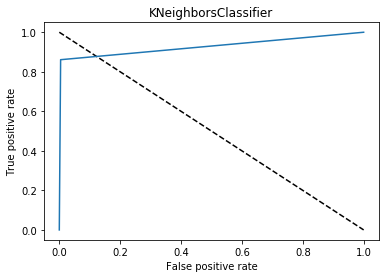

In [73]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction

plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()

As from this data set we have following conclusion:

- taking price as y variable is predicting well for this model as comapared to region
- also r2 score value is also greater then accuracy score

In [77]:
#lets save the final model
from sklearn.externals import joblib

#save the model as pickle in a file
joblib.dump(KNC,'Avocado sol.csv')

['Avocado sol.csv']